In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
in_out=pd.read_csv("data/new/Import_and_Export.csv",encoding="utf-8")
in_out.head()

,date,Export amount,Export growth rate,Import amount,Import growth rate
0,2015-01-01,"45,105,389",-1.0,"39,283,025",-12.2
1,2015-02-01,"41,472,191",-3.4,"33,998,316",-19.2
2,2015-03-01,"46,822,771",-4.6,"38,485,935",-15.5
3,2015-04-01,"46,221,931",-8.0,"37,858,798",-17.5
4,2015-05-01,"42,327,311",-11.0,"36,039,800",-15.4


In [3]:
in_out.shape

(112, 5)

In [4]:
in_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                112 non-null    object 
 1   Export amount       112 non-null    object 
 2   Export growth rate  112 non-null    float64
 3   Import amount       112 non-null    object 
 4   Import growth rate  112 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.5+ KB


In [5]:
in_out.dtypes

date                   object
Export amount          object
Export growth rate    float64
Import amount          object
Import growth rate    float64
dtype: object

In [6]:
#날짜 형식 변경
in_out['date'] = pd.to_datetime(in_out['date'])

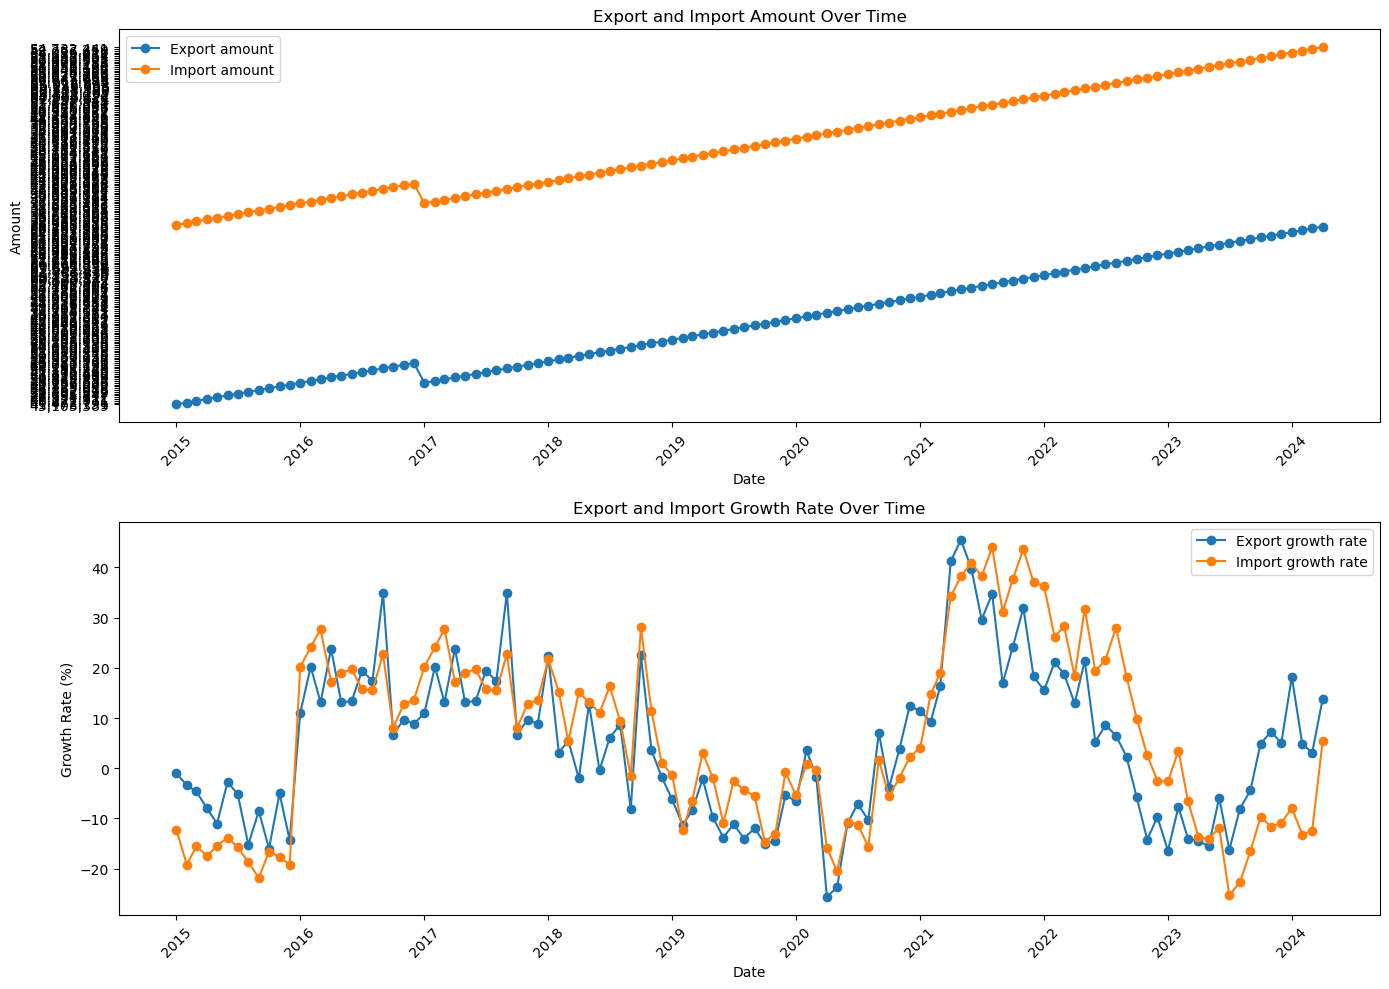

In [7]:
# 그래프 그리기
plt.figure(figsize=(14, 10))

# 수출 및 수입 금액 그래프
plt.subplot(2, 1, 1)
plt.plot(in_out['date'], in_out['Export amount'], marker='o', linestyle='-', label='Export amount')
plt.plot(in_out['date'], in_out['Import amount'], marker='o', linestyle='-', label='Import amount')
plt.title('Export and Import Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()

# 수출 및 수입 성장률 그래프
plt.subplot(2, 1, 2)
plt.plot(in_out['date'], in_out['Export growth rate'], marker='o', linestyle='-', label='Export growth rate')
plt.plot(in_out['date'], in_out['Import growth rate'], marker='o', linestyle='-', label='Import growth rate')
plt.title('Export and Import Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
in_out.set_index('date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
in_out = in_out.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
in_out.reset_index(inplace=True)
in_out['date'] = in_out['date'].dt.strftime('%Y-%m-%d')

# 결과 출력
in_out

,date,Export amount,Export growth rate,Import amount,Import growth rate
0,2015-01-01,"45,105,389",-1.0,"39,283,025",-12.2
1,2015-01-02,"45,105,389",-1.0,"39,283,025",-12.2
2,2015-01-03,"45,105,389",-1.0,"39,283,025",-12.2
3,2015-01-04,"45,105,389",-1.0,"39,283,025",-12.2
4,2015-01-05,"45,105,389",-1.0,"39,283,025",-12.2
...,...,...,...,...,...
3374,2024-03-28,"56,557,850",3.1,"52,267,259",-12.4
3375,2024-03-29,"56,557,850",3.1,"52,267,259",-12.4
3376,2024-03-30,"56,557,850",3.1,"52,267,259",-12.4
3377,2024-03-31,"56,557,850",3.1,"52,267,259",-12.4


In [9]:
in_out.to_csv('Import_and_Export_cleaned.csv',index=False)